In [2]:
pip install snowflake-connector-python[pandas]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
 pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------- ---------------- 1.0/1.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade snowflake-connector-python[pandas]

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [147]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import getpass
import snowflake.connector
%matplotlib inline
from datetime import datetime , timedelta

C:\Users\asmit\AppData\Local\Temp\ipykernel_15500\3541215196.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [333]:
import snowflake.connector
conn = snowflake.connector.connect(
        user="MAUU",
        password="Mauu@1623",
        account="gq46029.ap-southeast-1",  # Use the full account identifier
        database="RETAILS",  # Ensure this database exists
        schema="PUBLIC",    # Ensure this schema exists
        warehouse="COMPUTE_WH"  # Ensure this warehouse is available
    )


In [334]:
cur = conn.cursor()

In [335]:
select_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'


In [336]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [337]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [338]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [339]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [340]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [341]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()


In [342]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [343]:
cur.close()
conn.close()

In [344]:
demographic_RAW.head(5)


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [345]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [346]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [347]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
2,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
3,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ
4,26540,69,GROCERY,Private,COOKIES/CONES,TRAY PACK/CHOC CHIP COOKIES,16 OZ


In [348]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [349]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [350]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [351]:
TRANSACTION_RAW.shape

(450416, 12)

In [352]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [353]:
COUPON_RAW.shape

(124548, 3)

In [354]:
PRODUCT_RAW.shape

(184706, 7)

In [355]:
CAMPAIGN_RAW.shape

(7208, 3)

In [356]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [357]:
**Checking the null values for cleaning the data!!**

In [358]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [359]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [361]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [362]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [363]:
PRODUCT_RAW.isnull().sum() ##there is some null values in product table

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [364]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [365]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [ ]:
**Data Modifications**

In [ ]:
**date coversation using datetime function**

In [368]:
from datetime import datetime,timedelta

In [369]:
start_date = pd.to_datetime('2022-01-01')

In [370]:
TRANSACTION_RAW['Date'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'],unit='D')

In [371]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2022-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2022-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2022-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2022-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2022-01-02


In [372]:
CAMPAIGN_DESC_RAW['START_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit='D')

In [373]:
CAMPAIGN_DESC_RAW['END_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit='D')

In [374]:
CAMPAIGN_DESC_RAW['Campaign_Duration'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [375]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,Campaign_Duration
0,TypeB,24,659,719,2023-10-22,2023-12-21,60
1,TypeC,15,547,708,2023-07-02,2023-12-10,161
2,TypeB,25,659,691,2023-10-22,2023-11-23,32
3,TypeC,20,615,685,2023-09-08,2023-11-17,70
4,TypeB,23,646,684,2023-10-09,2023-11-16,38
5,TypeB,21,624,656,2023-09-17,2023-10-19,32
6,TypeB,22,624,656,2023-09-17,2023-10-19,32
7,TypeA,18,587,642,2023-08-11,2023-10-05,55
8,TypeB,19,603,635,2023-08-27,2023-09-28,32
9,TypeB,17,575,607,2023-07-30,2023-08-31,32


In [376]:
COUPON_REDEMPT_RAW['Date'] = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],unit='D')

In [377]:
COUPON_REDEMPT_RAW.head(10)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2023-02-26
1,1,421,51700010076,8,2023-02-26
2,1,427,54200000033,8,2023-03-04
3,1,597,10000085476,18,2023-08-21
4,1,597,54200029176,18,2023-08-21
5,8,422,53600000078,8,2023-02-27
6,13,396,53700048182,5,2023-02-01
7,13,424,10000085364,8,2023-03-01
8,13,434,53600000078,8,2023-03-11
9,13,447,52370020076,8,2023-03-24


In [378]:
TRANSACTION_RAW['Date'].max()

Timestamp('2022-06-26 00:00:00')

In [379]:
COUPON_REDEMPT_RAW['Date'].max()

Timestamp('2023-12-06 00:00:00')

In [380]:
CAMPAIGN_DESC_RAW['END_DATE'].max()

Timestamp('2023-12-21 00:00:00')

In [ ]:
**Understanding the data**

In [382]:
demographic_RAW.head(2)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7


In [383]:
demographic_RAW.shape

(2500, 8)

In [384]:
demographic_RAW.columns

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'HOUSEHOLD_KEY'],
      dtype='object')

In [385]:
demographic_RAW.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
HOUSEHOLD_KEY           int16
dtype: object

In [386]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [387]:
demographic_RAW['AGE_DESC'].value_counts()

AGE_DESC
45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: count, dtype: int64

In [388]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

HOUSEHOLD_SIZE_DESC
2     1004
1      783
3      338
5+     206
4      169
Name: count, dtype: int64

In [389]:
CAMPAIGN_DESC_RAW.head(2)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,Campaign_Duration
0,TypeB,24,659,719,2023-10-22,2023-12-21,60
1,TypeC,15,547,708,2023-07-02,2023-12-10,161


In [390]:
CAMPAIGN_DESC_RAW.shape

(30, 7)

In [391]:
CAMPAIGN_DESC_RAW.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'START_DATE',
       'END_DATE', 'Campaign_Duration'],
      dtype='object')

In [392]:
CAMPAIGN_DESC_RAW['Campaign_Duration'].mean()

np.float64(46.6)

<Axes: xlabel='CAMPAIGN', ylabel='Campaign_Duration'>

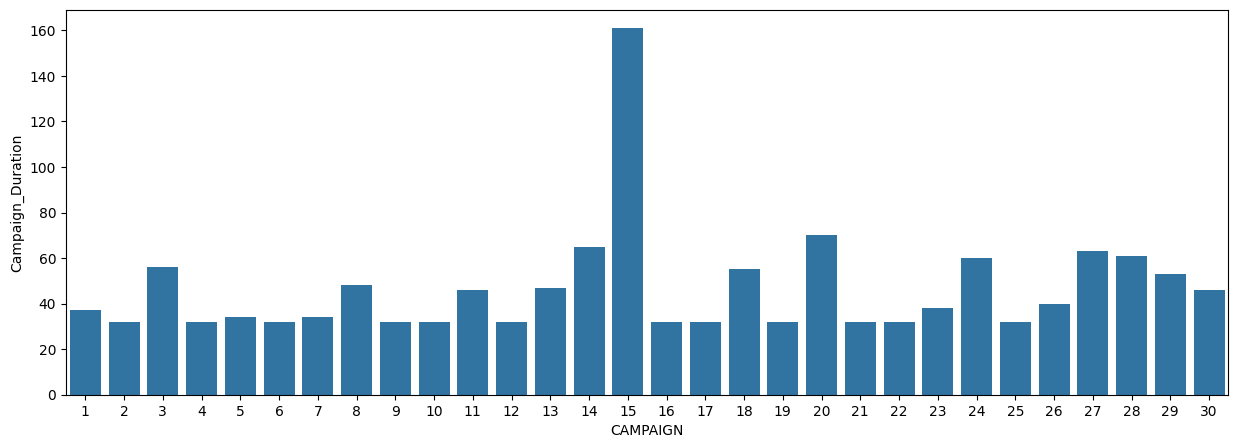

In [393]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Campaign_Duration',data=CAMPAIGN_DESC_RAW)

In [208]:
**Campagin 15 last more than 160 days.**

In [394]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','Campaign_Duration':'mean'})

,CAMPAIGN,Campaign_Duration
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


In [ ]:
**They have 19 type B campagin,whose average length was 38 days. In comparison,there has been 6 type C campagin of 75 days on average.**

In [396]:
CAMPAIGN_DESC_RAW['Start_Month'] = CAMPAIGN_DESC_RAW['START_DATE'].dt.strftime('%m')

In [397]:
CAMPAIGN_DESC_RAW['End_Month'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.strftime('%m')

In [398]:
CAMPAIGN_DESC_RAW['Start_Year'] = CAMPAIGN_DESC_RAW['START_DATE'].dt.strftime('%Y')

In [399]:
CAMPAIGN_DESC_RAW['End_Year'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.strftime('%Y')

In [400]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
0,TypeB,24,659,719,2023-10-22,2023-12-21,60,10,12,2023,2023
1,TypeC,15,547,708,2023-07-02,2023-12-10,161,07,12,2023,2023
2,TypeB,25,659,691,2023-10-22,2023-11-23,32,10,11,2023,2023
3,TypeC,20,615,685,2023-09-08,2023-11-17,70,09,11,2023,2023
4,TypeB,23,646,684,2023-10-09,2023-11-16,38,10,11,2023,2023


In [401]:
CAMPAIGN_RAW.head()

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [402]:
CAMPAIGN_RAW.shape

(7208, 3)

In [403]:
CAMPAIGN_RAW.columns

Index(['DESCRIPTION', 'HOUSEHOLD_KEY', 'CAMPAIGN'], dtype='object')

In [404]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [405]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [ ]:
**There are 1584 household have participated to the campagin,levaing 916 who never participated to any campagin.** 

In [407]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY').aggregate({'CAMPAIGN':'count'})

,CAMPAIGN
HOUSEHOLD_KEY,
1,8
2,1
3,3
4,1
6,4
...,...
2496,5
2497,3
2498,6


Text(0, 0.5, 'Number of Household Reached')

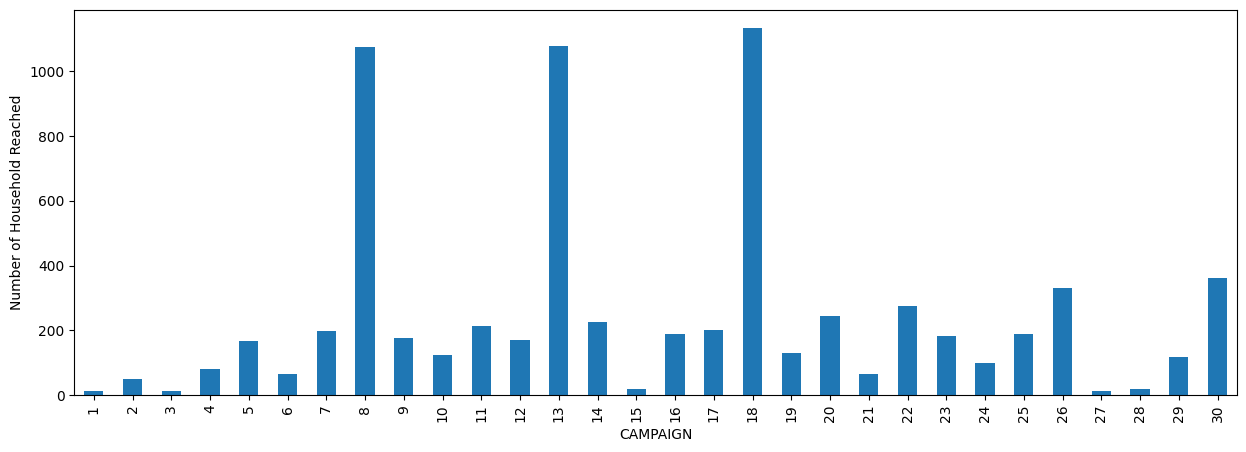

In [408]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of Household Reached')

In [ ]:
**In the Campagin 18 most Household is participated.**

In [410]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [411]:
COUPON_RAW.shape

(124548, 3)

In [412]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [413]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [414]:
COUPON_GIVEN=COUPON_RAW.groupby('CAMPAIGN').aggregate(Total_Product= ('PRODUCT_ID','nunique'),   
                                                  Total_Copoun_Given = ('COUPON_UPC','nunique'))

In [415]:
COUPON_GIVEN.sort_values(by='Total_Product', ascending=False).head(5)

,Total_Product,Total_Copoun_Given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181


In [416]:
COUPON_GIVEN = COUPON_GIVEN.merge(right=CAMPAIGN_DESC_RAW,on='CAMPAIGN',how='left')

In [417]:
COUPON_GIVEN.head()

,CAMPAIGN,Total_Product,Total_Copoun_Given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
0,1,383,11,TypeB,346,383,2022-12-13,2023-01-19,37,12,01,2022,2023
1,2,301,16,TypeB,351,383,2022-12-18,2023-01-19,32,12,01,2022,2023
2,3,506,34,TypeC,356,412,2022-12-23,2023-02-17,56,12,02,2022,2023
3,4,200,12,TypeB,372,404,2023-01-08,2023-02-09,32,01,02,2023,2023
4,5,443,11,TypeB,377,411,2023-01-13,2023-02-16,34,01,02,2023,2023


In [418]:
COUPON_GIVEN.loc[:,('CAMPAIGN','Total_Product','Total_Copoun_Given','DESCRIPTION','START_DATE','END_DATE','Campaign_Duration','Start_Month','End_Month','Start_Year','End_Year')].sort_values(by='Total_Product',ascending=False).head(8)

,CAMPAIGN,Total_Product,Total_Copoun_Given,DESCRIPTION,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
12,13,35616,207,TypeA,2023-05-20,2023-07-06,47,05,07,2023,2023
17,18,35513,209,TypeA,2023-08-11,2023-10-05,55,08,10,2023,2023
7,8,17178,209,TypeA,2023-02-17,2023-04-06,48,02,04,2023,2023
25,26,3396,181,TypeA,2022-08-13,2022-09-22,40,08,09,2022,2022
29,30,3205,181,TypeA,2022-11-20,2023-01-05,46,11,01,2022,2023
21,22,1917,21,TypeB,2023-09-17,2023-10-19,32,09,10,2023,2023
23,24,1887,2,TypeB,2023-10-22,2023-12-21,60,10,12,2023,2023
15,16,1025,13,TypeB,2023-07-16,2023-08-17,32,07,08,2023,2023


In [419]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [420]:
PRODUCT_RAW.head(10)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
2,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
3,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ
4,26540,69,GROCERY,Private,COOKIES/CONES,TRAY PACK/CHOC CHIP COOKIES,16 OZ
5,26601,69,DRUG GM,Private,VITAMINS,VITAMIN - MINERALS,300CT(1)
6,26691,16,GROCERY,Private,PNT BTR/JELLY/JAMS,HONEY,12 OZ
7,26738,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ
8,26941,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ
9,27030,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ


In [421]:
COUPON_Products = COUPON_RAW.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [422]:
COUPON_Products.head(10)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
2,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
3,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
4,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
5,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
6,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
7,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
8,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ
9,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [423]:
COUPON_Products['COMMODITY_DESC'].value_counts()

COMMODITY_DESC
HAIR CARE PRODUCTS        12522
MAKEUP AND TREATMENT      11170
FRZN MEAT/MEAT DINNERS     9786
FROZEN PIZZA               7316
BEEF                       6628
                          ...  
MISCELLANEOUS CROUTONS        4
TICKETS                       2
COFFEE SHOP                   2
BOOKSTORE                     2
BEVERAGE                      2
Name: count, Length: 266, dtype: int64

In [424]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2023-02-26
1,1,421,51700010076,8,2023-02-26
2,1,427,54200000033,8,2023-03-04
3,1,597,10000085476,18,2023-08-21
4,1,597,54200029176,18,2023-08-21


In [425]:
COUPON_REDEMPT_RAW.shape

(2318, 5)

In [426]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

<Axes: xlabel='CAMPAIGN'>

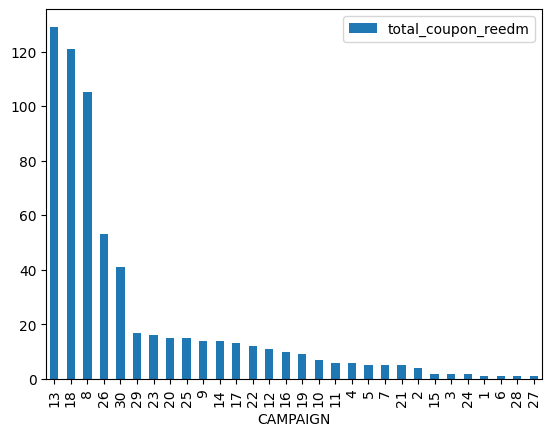

In [427]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique')).sort_values(by='total_coupon_reedm',ascending=False).plot.bar()

In [428]:
Coupon_Reedm = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique'))

In [429]:
Coupon_Reedm.head(10)

,total_coupon_reedm
CAMPAIGN,
1,1
2,4
3,2
4,6
5,5
6,1
7,5
8,105
9,14


In [430]:
COUPON_GIVEN.head()

,CAMPAIGN,Total_Product,Total_Copoun_Given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
0,1,383,11,TypeB,346,383,2022-12-13,2023-01-19,37,12,01,2022,2023
1,2,301,16,TypeB,351,383,2022-12-18,2023-01-19,32,12,01,2022,2023
2,3,506,34,TypeC,356,412,2022-12-23,2023-02-17,56,12,02,2022,2023
3,4,200,12,TypeB,372,404,2023-01-08,2023-02-09,32,01,02,2023,2023
4,5,443,11,TypeB,377,411,2023-01-13,2023-02-16,34,01,02,2023,2023


In [431]:
Coupon_Reedm.head()

,total_coupon_reedm
CAMPAIGN,
1,1
2,4
3,2
4,6
5,5


In [432]:
Coupon_Reedm = Coupon_Reedm.merge(right= COUPON_GIVEN,on='CAMPAIGN',how='left')

In [433]:
Coupon_Reedm.head()

,CAMPAIGN,total_coupon_reedm,Total_Product,Total_Copoun_Given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
0,1,1,383,11,TypeB,346,383,2022-12-13,2023-01-19,37,12,01,2022,2023
1,2,4,301,16,TypeB,351,383,2022-12-18,2023-01-19,32,12,01,2022,2023
2,3,2,506,34,TypeC,356,412,2022-12-23,2023-02-17,56,12,02,2022,2023
3,4,6,200,12,TypeB,372,404,2023-01-08,2023-02-09,32,01,02,2023,2023
4,5,5,443,11,TypeB,377,411,2023-01-13,2023-02-16,34,01,02,2023,2023


In [434]:
Coupon_Reedm['Coupon_reedm_rate']=(Coupon_Reedm['total_coupon_reedm']/Coupon_Reedm['Total_Copoun_Given'])*100

<Axes: xlabel='CAMPAIGN', ylabel='Coupon_reedm_rate'>

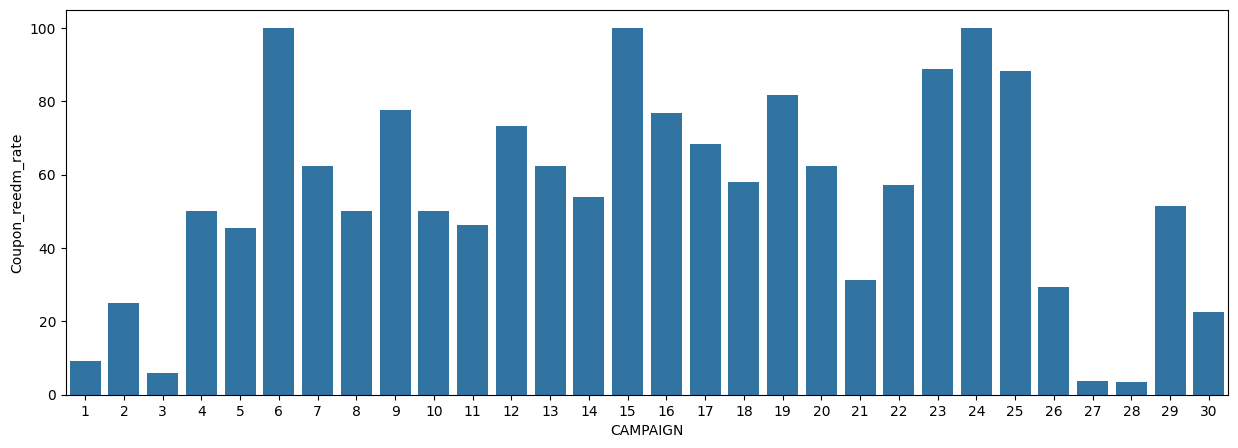

In [435]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Coupon_reedm_rate',data=Coupon_Reedm)

In [436]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2022-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2022-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2022-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2022-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2022-01-02


In [437]:
Tnx_Bucket = TRANSACTION_RAW.groupby('BASKET_ID').agg({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [438]:
Tnx_Bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [439]:
Tnx_Bucket['Use_Coupon']=Tnx_Bucket['COUPON_DISC']!=0

In [440]:

Tnx_Bucket['Use_Coupon'].value_counts().head()

Use_Coupon
False    47892
True      2587
Name: count, dtype: int64

In [441]:
Tnx_Bucket.sort_values('SALES_VALUE',ascending=False).head(10)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_Coupon
BASKET_ID,,,,
27534431747,465.70,-3,-1,True
27798435271,463.17,-2,-2,True
27093315740,400.79,0,0,False
28941937397,400.56,-1,0,True
28210676830,391.05,0,0,False
27950470466,376.38,-2,0,True
29034966796,369.48,0,0,False
28919755135,368.95,0,0,False
28675556859,365.86,-3,0,True


In [442]:
round(Tnx_Bucket['SALES_VALUE'].mean(),2)

np.float64(26.93)

In [443]:
Tnx_desc = TRANSACTION_RAW.merge(right= Tnx_Bucket,on='BASKET_ID',how='left')

In [444]:
Tnx_desc= Tnx_desc.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [445]:
Tnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_Coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
3,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
4,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,Not Specified


In [446]:
Tnx_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis=1,inplace=True)

In [447]:
Tnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,Use_Coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0,0,2022-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0,0,2022-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0,0,2022-01-02,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
3,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0,0,2022-01-02,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
4,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0,0,2022-01-02,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,Not Specified


In [448]:
COMMODITY_Coupon = Tnx_desc.groupby('COMMODITY_DESC').aggregate(total_quantity=('QUANTITY','count'),
                                             Use_coupon=('Use_Coupon','sum'),
                                             Coupon=('COUPON_DISC_x','sum'))

In [449]:
COMMODITY_Coupon

,total_quantity,Use_coupon,Coupon
COMMODITY_DESC,,,
(CORP USE ONLY),24,0,0
ADULT INCONTINENCE,148,6,-2
AIR CARE,1856,386,-248
ANALGESICS,1362,178,-6
ANTACIDS,614,72,-14
...,...,...,...
WAREHOUSE SNACKS,3692,426,-36
WATCHES/CALCULATORS/LOBBY,24,0,0
WATER,726,72,0


In [450]:
COMMODITY_Coupon['Coupon%']=round((COMMODITY_Coupon['Use_coupon']/COMMODITY_Coupon['total_quantity'])*100,2)

In [451]:
COMMODITY_Coupon.sort_values('Coupon%',ascending=False).head(30)

,total_quantity,Use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
NATURAL VITAMINS,2,2,-10,100.00
Default_Value,1303,872,-1396,66.92
Unknown,1303,872,-1396,66.92
VALENTINE,10,4,0,40.00
BABY FOODS,7328,2228,-76,30.40
RW FRESH PROCESSED MEAT,14,4,0,28.57
DIAPERS & DISPOSABLES,1728,462,-430,26.74
BABY HBC,1634,362,-164,22.15
AIR CARE,1856,386,-248,20.80


In [452]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                  'COUPON_DISC' :'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          21      145        50.23        -2.02           -3   
              22      150        55.03        -2.17            0   
              26      174       110.30       -49.05           -1   
                      175        10.59         0.00           -2   
                      176        20.26        -2.51            0   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          21      145                  0  
              22      150                  0  
              26      174                  0  
                      175                  0  
                      176                  0  

[40506 rows x 4 columns]

In [453]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2022-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2022-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2022-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2022-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2022-01-02


In [454]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['Date'].dt.year).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                   'COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
Date,,,
2022,1359551.73,-248978.11,-6693


In [455]:
**Droping the columns**

SyntaxError: invalid syntax (400963062.py, line 1)

In [456]:
from datetime import datetime

In [457]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [458]:
CAMPAIGN_DESC_RAW.head(3)

,DESCRIPTION,CAMPAIGN,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
0,TypeB,24,2023-10-22,2023-12-21,60,10,12,2023,2023
1,TypeC,15,2023-07-02,2023-12-10,161,07,12,2023,2023
2,TypeB,25,2023-10-22,2023-11-23,32,10,11,2023,2023


In [459]:
CAMPAIGN_DESC_RAW['START_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['START_DATE']).apply(lambda x: x.date())

In [460]:
type(CAMPAIGN_DESC_RAW['START_DATE'])

pandas.core.series.Series

In [461]:
CAMPAIGN_DESC_RAW['START_DATE'] 

0     2023-10-22
1     2023-07-02
2     2023-10-22
3     2023-09-08
4     2023-10-09
5     2023-09-17
6     2023-09-17
7     2023-08-11
8     2023-08-27
9     2023-07-30
10    2023-06-16
11    2023-07-16
12    2023-05-20
13    2023-04-23
14    2023-04-23
15    2023-04-09
16    2023-03-12
17    2023-02-17
18    2023-02-03
19    2023-01-29
20    2022-12-23
21    2023-01-13
22    2023-01-08
23    2022-12-13
24    2022-12-18
25    2022-11-20
26    2022-10-09
27    2022-09-17
28    2022-08-26
29    2022-08-13
Name: START_DATE, dtype: object

In [462]:
CAMPAIGN_DESC_RAW['END_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['END_DATE']).apply(lambda x: x.date())


In [463]:
type(CAMPAIGN_DESC_RAW['END_DATE'])

pandas.core.series.Series

In [464]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION          object
CAMPAIGN               int8
START_DATE           object
END_DATE             object
Campaign_Duration     int16
Start_Month          object
End_Month            object
Start_Year           object
End_Year             object
dtype: object

In [465]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis=1,inplace=True)

In [466]:
COUPON_REDEMPT_RAW.head(3)

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2023-02-26
1,1,51700010076,8,2023-02-26
2,1,54200000033,8,2023-03-04


In [467]:
COUPON_REDEMPT_RAW['Date']=pd.to_datetime(COUPON_REDEMPT_RAW['Date']).apply(lambda x: x.date())

In [468]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [469]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [470]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1004906,1,1.39,364,-0.60,1631,0,0,2022-01-02
1,2375,26984851472,1033142,1,0.82,364,0.00,1631,0,0,2022-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.30,1631,0,0,2022-01-02
3,2375,26984851472,1082185,1,1.21,364,0.00,1631,0,0,2022-01-02
4,2375,26984851472,8160430,1,1.50,364,-0.39,1631,0,0,2022-01-02


In [471]:
TRANSACTION_RAW['Date']=pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x: x.date())

In [472]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

In [473]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1004906,1,1.39,364,-0.60,1631,0,0,2022-01-02
1,2375,26984851472,1033142,1,0.82,364,0.00,1631,0,0,2022-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.30,1631,0,0,2022-01-02
3,2375,26984851472,1082185,1,1.21,364,0.00,1631,0,0,2022-01-02
4,2375,26984851472,8160430,1,1.50,364,-0.39,1631,0,0,2022-01-02
5,2375,26984851516,826249,2,1.98,364,-0.60,1642,0,0,2022-01-02
6,2375,26984851516,1043142,1,1.57,364,-0.68,1642,0,0,2022-01-02
7,2375,26984851516,1085983,1,2.99,364,-0.40,1642,0,0,2022-01-02
8,2375,26984851516,1102651,1,1.89,364,0.00,1642,0,0,2022-01-02
9,2375,26984851516,6423775,1,2.00,364,-0.79,1642,0,0,2022-01-02


In [474]:
**Now loading the table to Db**

SyntaxError: invalid syntax (2598695907.py, line 1)

In [475]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [476]:
 conn = snowflake.connector.connect(
        user="MAUU",
        password="Mauu@1623",
        account="gq46029.ap-southeast-1",  # Use the full account identifier
        database="RETAILS",  # Ensure this database exists
        schema="PUBLIC",    # Ensure this schema exists
        warehouse="COMPUTE_WH"  # Ensure this warehouse is available
    )


In [477]:
cur=conn.cursor()

In [478]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [479]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [480]:
CAMPAIGN_DESC_RAW.head() ## cleaned raw dataframe

,DESCRIPTION,CAMPAIGN,START_DATE,END_DATE,Campaign_Duration,Start_Month,End_Month,Start_Year,End_Year
0,TypeB,24,2023-10-22,2023-12-21,60,10,12,2023,2023
1,TypeC,15,2023-07-02,2023-12-10,161,07,12,2023,2023
2,TypeB,25,2023-10-22,2023-11-23,32,10,11,2023,2023
3,TypeC,20,2023-09-08,2023-11-17,70,09,11,2023,2023
4,TypeB,23,2023-10-09,2023-11-16,38,10,11,2023,2023


In [481]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date  date,
Campaign_Duration NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
Start_Year INT,
End_Year INT)''')

In [482]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [483]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [484]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416
